# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


In [194]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
plt.rcParams.update({
    'font.family':'cmr10',
    'mathtext.fontset': 'cm',
    'axes.formatter.use_mathtext': True,
    'axes.axisbelow': True,
    'figure.figsize': [6.0, 6.0],
    'axes.labelsize': 15,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'font.size':15,
    'savefig.directory':'./Images'
})

The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on two variational parameters: $\sigma$ and $\mu$.

### Exercise 08.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps for the set of parameters which minimize $\langle {\hat H} \rangle_T$
- show also a picture **of the sampled** $|\Psi_T(x)|^2$ by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

#### Soluzione
#### Es 8.1
Il  valore di aspettazione dell'hamiltoniana $H = K + V$ è dato dal seguente integrale:
$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

dove $H\psi$ è dato da:

$$H\psi =  \frac {({ -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2}} + x^4 - \frac{5}{2}x^2)\Psi_T^{\sigma,\mu}(x)} {\Psi_T^{\sigma,\mu}(x)} $$

quindi con l'algoritmo di Metropolis campioniamo la densità di probabilità che è il quadrato del valor medio di $\psi$ e calcoliamo il valore dell'integrale conoscendo il risultato analitico di $H\psi$.

Per farlo equilibriamo l'algoritmo di metropolis per raggiungere un punto di inzio sensato e un'accettazione di circa $50\%$, come spiegato nell'esercizio 5.
In seguito per valutare il valor medio $\langle {\hat H} \rangle_T $ applichiamo il data blocking al valore di $\frac{\hat H \psi(x)}{\psi(x)}$ campionando i passi di $x$ con il Metropolis. Otteniamo i seguenti risultati per $\sigma = 1$ e $\mu = 0$:


Parametri della simulazione:
- $M = 10^5$ (passi totali)
- $N = 10^3$ (blocchi)
- $M_{equil} = 200$ (passi per l'equilibrazione)
- $\mu = 0$
- $\sigma = 1$

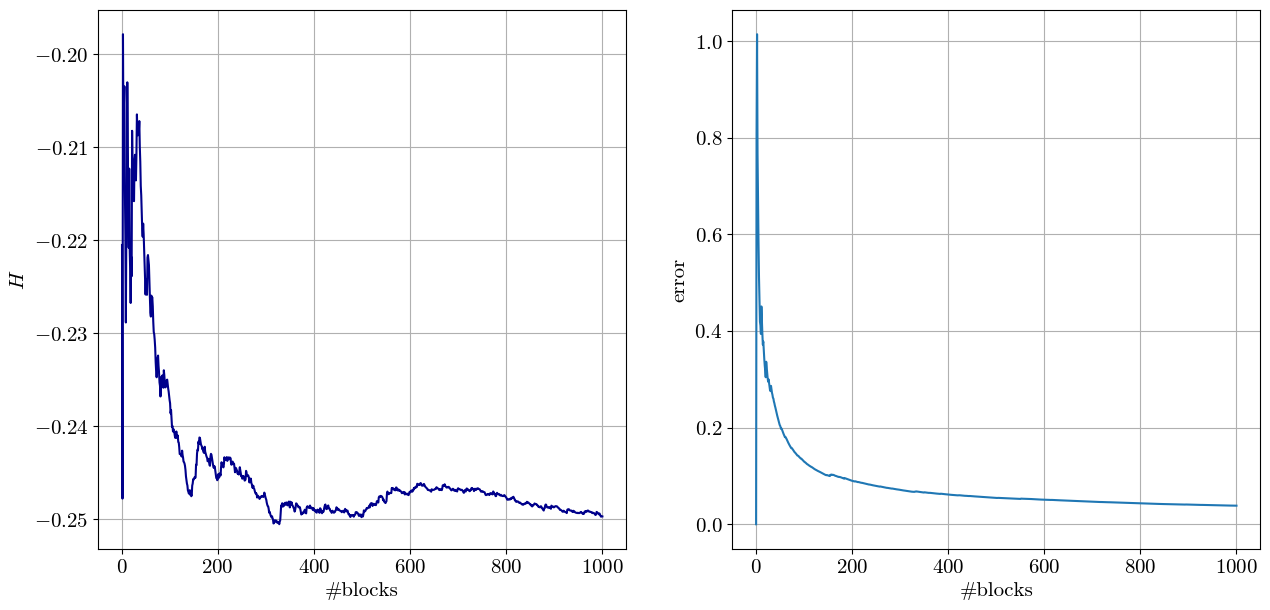

In [195]:
H_medio = np.loadtxt("es8_1/H_medio.txt")
x1 = H_medio[:,0]
y1 = H_medio[:,1]
err1 = H_medio[:,2]

plt.figure(1,figsize=(15, 7))
plt.subplot(1,2,1)
plt.plot(x1,y1,color='darkblue')
#C'è UN ERRORRE NEL CALCOLO DELL'ERRORE!!!
#plt.errorbar(x1,y1, err1, color = 'blue', ecolor = 'lightblue') 
plt.ylabel('$H$')
plt.xlabel('#blocks')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(x1, err1)
plt.ylabel('error')
plt.xlabel('#blocks')
plt.grid(True)


plt.show()

##### Es 8.2
In questa seconda parte dell'esercitazione cerchiamo i parametri $\sigma$ e $\mu$ che minimizzano il valor medio $\langle {\hat H} \rangle_T$, per far questo applichiamo l'algoritmo del Simulated Anneanling.

Partendo da valori iniziali: 
- $\sigma = 1$ 
- $\mu = 0$
- $T_0 = 100$

ad ogni passo aggiorniamo i loro valori secondo le leggi:
- $T_k = \frac{T_0}{k^{1.1}}$
- $\mu_k = \mu_{k-1} + r/2$
- $\sigma_k = \sigma_{k-1} + r/2$

con $r$ numero casuale estratto con il metodo ``` Rannyu(-1,1) ``` del generatore di numeri pseudo causuali. Nell'aggiornare $\sigma$ bisogna far si che il valore non arrivi mai a 0 perchè questo causerebbe un problema nel calcolo di $\psi$, dato che in $\psi$ $\sigma$ si trova a denominatore, quindi metto un controllo in modo tale che se tale parametro risulta essere $< 0.2$ esso viene ricalcolato.

Per ogni valore di temperatura, mu e sigma eseguiamo il calcolo di $\langle \hat H \rangle$ come fatto nell'esercizio 8.1, accettiamo queli valori di sigma e mu solo se il nuovo valore di energia trovato è minore del precedente, altrimenti si rifiuta la mossa. 
``` c++
// accettazione:
if (Hmedio[k] > Hmedio[k-1]){
    p = exp(-(1/T[k])*(Hmedio[k]-Hmedio[k-1]));
    if (rnd.Rannyu() > p) {
        Hmedio[k] = Hmedio[k-1];
        mu[k] = mu[k-1];
        sigma[k] = sigma[k-1];
    }
}
```
Per ogni temperatura salviamo il valore dell'energia media e i valori di sigma e mu corrispindenti. Dopo aver eseguito questo processo per $N_{step}$ volte valutiamo il valor medio di energia con gli ultimi valori di $\mu$ e $\sigma$ trovati.
In seguito riportiamo l'andamento dell'energia al diminuire della temperatura, i valori di sigma e mu nella ricerca di quelli che portano un valore minimo di energia e l'andamento dell'energia (con la blocking average) con i valori di $\mu$ e $\sigma$ trovati.

Parametri del sistema:
- $N_{step} = 10^4$, passi del campionamento di Metropolis per trovare i valori di $\sigma$ e $\mu$ che minimizzano l'energia 
- $10^6$ passi divisi in $10^3$ blocchi per la _blocking average_

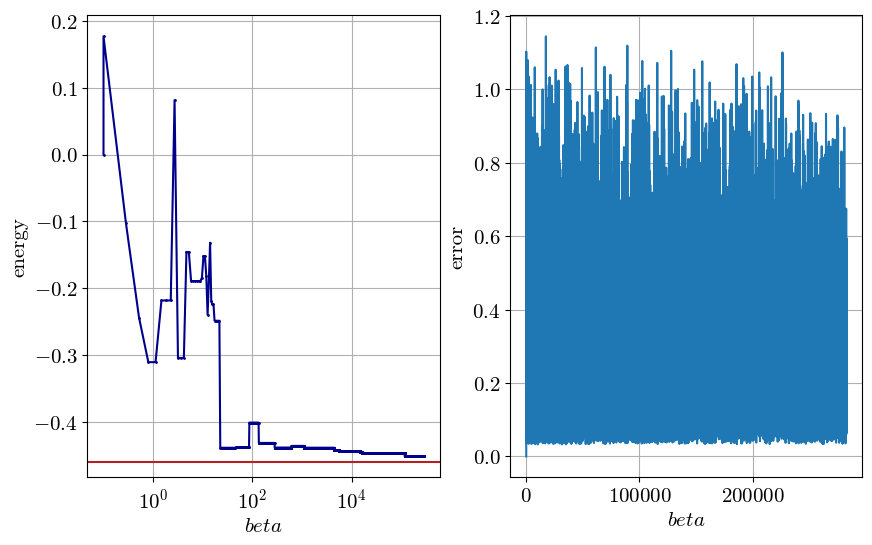

In [196]:
# H_medio (T)
H_T = np.loadtxt("es8_2/H_T.dat")
x = H_T[:,1]
y = H_T[:,4]
err = H_T[:,5]

plt.figure(1,figsize=(10, 6))
plt.subplot(1,2,1)
plt.xscale('log')
plt.plot(1/x,y,color='darkblue', marker = 'o', markersize = 1, linestyle = '-')
#plt.errorbar(1/x,y, err, color = 'blue', ecolor = 'lightblue') 
plt.axhline(y=-0.46, color='firebrick', linestyle='-')
plt.ylabel('energy')
plt.xlabel('$beta$')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(1/x, err)
plt.ylabel('error')
plt.xlabel('$beta$')
plt.grid(True)

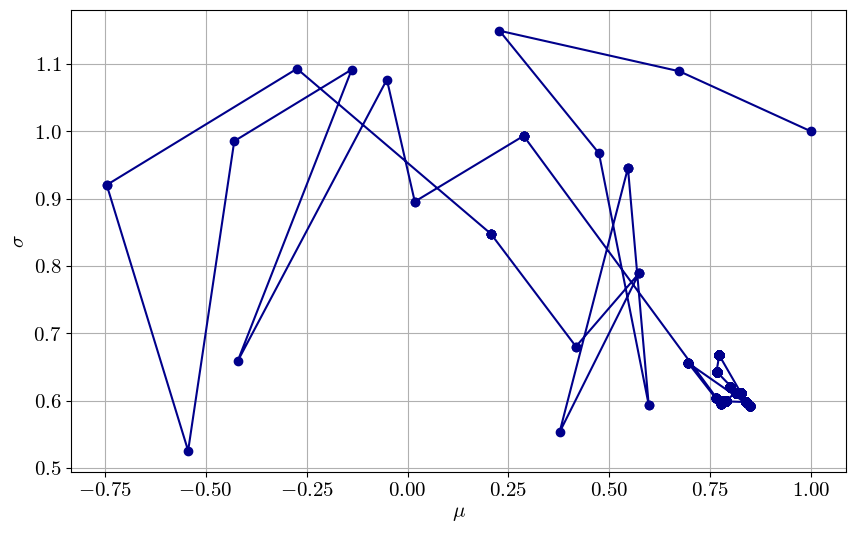

In [197]:

# piano mu_sigma
H_T = np.loadtxt("es8_2/H_T.dat")
x2 = H_T[:,2]
y2 = H_T[:,3]

plt.figure(2,figsize=(10, 6))
plt.plot(x2,y2,color='darkblue', marker = 'o', linestyle = '-')
plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
plt.grid(True)

plt.show()

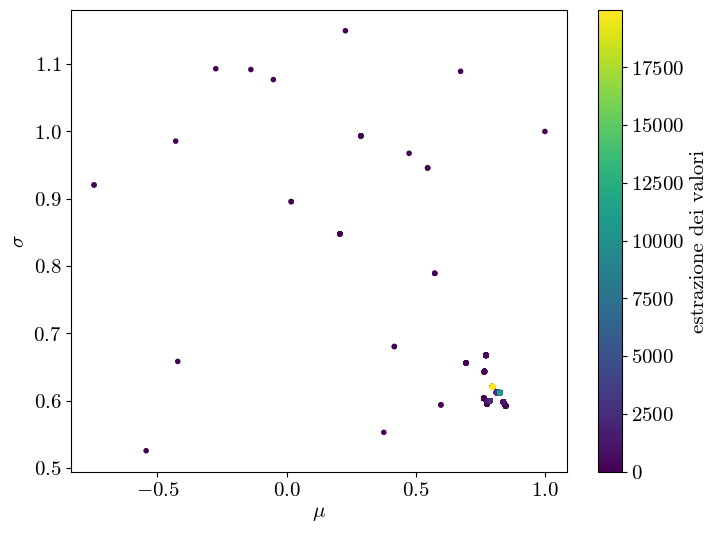

In [198]:
prob = np.loadtxt("es8_2/H_T.dat")
X = prob[:, 0]
Y = prob[:, 2]
Z = prob[:, 3]

plt.figure(figsize=(8, 6))
scatter = plt.scatter(Y, Z, c=X, cmap='viridis', marker='.')
plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
plt.colorbar(scatter, label='estrazione dei valori')

plt.show()


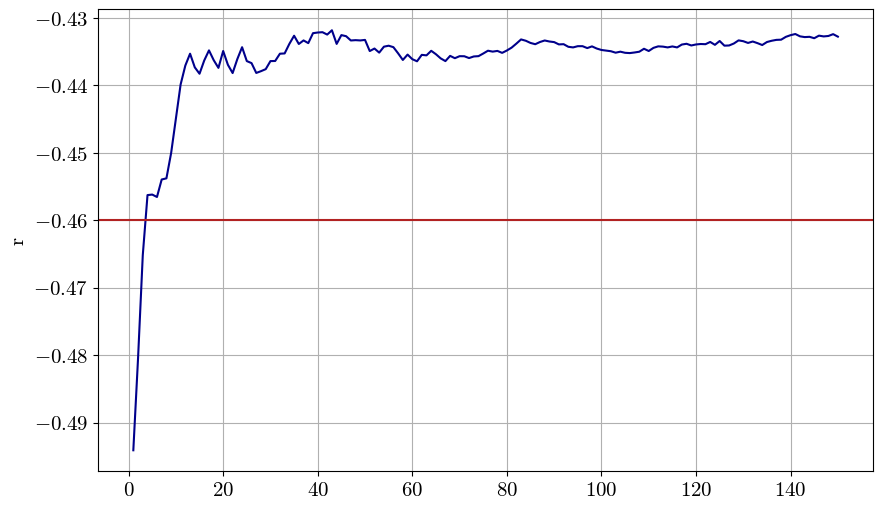

In [199]:
H_best = np.loadtxt("es8_2/H_medio_best.txt")
x1 = H_best[:,0]
y1 = H_best[:,1]
#err1 = H_best[:,2]

plt.figure(1,figsize=(10, 6))
plt.plot(x1,y1,color='darkblue')
plt.axhline(y=-0.46, color='firebrick', linestyle='-', label = 'expectation value')
plt.ylabel('r')
plt.grid(True)

plt.show()

Durante il calcolo del valor medio di $H$ con i parametri migliori ottenuti dall'ottimizzazione si è tenuta traccia anche del valori di $\psi(x)$ per poterlo confrontare con il risulatato analico della distribuzione di probabilità $ | \psi (x) |^2$ e con il profilo ottenuto descrivedno la funzione d'onda come un vettore di cui bisogna calcolare gli autvalori.
Otteniamo il seguente grafico:

In [200]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])



Ground state energy:  -0.46046587969271563


In [201]:
#analitical calculation
def eval_psi(x, mu, sigma): 
    den = 2 * sigma**2
    nor = ((np.pi*sigma*sigma)**(1/2)) * (2 + 2*np.exp(-(mu/sigma)**2))
    return pow(np.exp(-(x-mu)**2 /den) + np.exp(-(x+mu)**2 /den),2) /nor

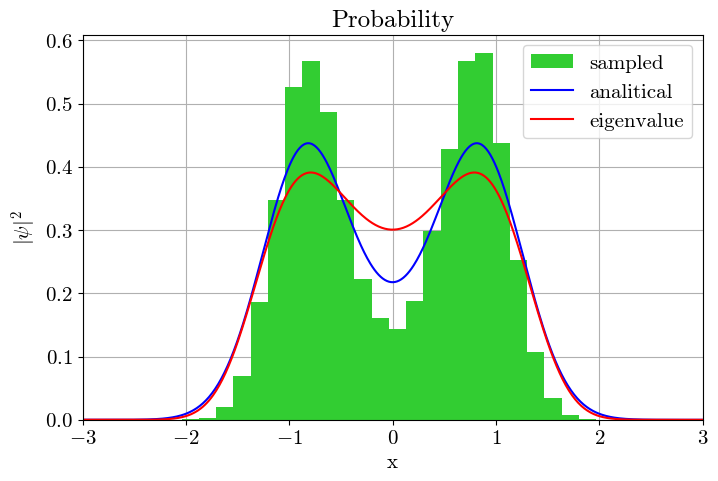

In [202]:
#dati campionamento
p = np.loadtxt("es8_2/probability.dat")
x_psi = p[:,0]
prob_density = p[:,1]

#plot
plt.figure(figsize=(8,5))
mu = 0.847546
sigma = 0.592103
plt.hist(x_psi, bins=30, weights=prob_density, density=True, color = 'limegreen', label = 'sampled')
plt.plot(x, eval_psi(x, mu, sigma), color = 'blue', label = 'analitical')
plt.plot(x,(psi[0])**2, color = 'red', label = 'eigenvalue')
plt.title("Probability")
plt.xlabel("x")
plt.ylabel('$ | \psi | ^2$')
plt.grid(True)
plt.xlim((-3,3))
#plt.ylim((-0.6,0.6))
plt.legend()
plt.show()